In [ ]:
import sqlite3

#This statement creates a connection labelled as conn.  This will be used throughout to ensure the consistency for when we start to query the database tables.
conn = sqlite3.connect('fmcg.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE employee_details_data (
    EmployeeID VARCHAR(10) PRIMARY KEY,
    Fname VARCHAR(32),
    Lname VARCHAR(32),
    Email VARCHAR(32),
    ContactNumber VARCHAR(32)
);
''')

cursor.execute('''
CREATE TABLE employee_managers_data (
    EmployeeID VARCHAR(10) PRIMARY KEY,
    ManagerID VARCHAR(10)
);
''')

cursor.execute('''
CREATE TABLE employee_roles_data (
    EmployeeID VARCHAR(10) PRIMARY KEY,
    Role VARCHAR(32),
    Department VARCHAR(32),
    Salary FLOAT
);
''')

cursor.execute('''
CREATE TABLE employee_store_data (
    EmployeeID VARCHAR(10),
    StoreID VARCHAR(32)
);
''')

cursor.execute('''
CREATE TABLE Sales (
    SalesID VARCHAR(32) PRIMARY KEY,
    Date DATETIME,
    StoreID VARCHAR(32),
    ProductID VARCHAR(32),
    Quantity INT,
    Salesvalue FLOAT,
    PromotionFlag INT,
    DiscountRate INT
);
''')

cursor.execute('''
CREATE TABLE Stores (
    StoreID VARCHAR(32) PRIMARY KEY,
    StoreType VARCHAR (32),
    StoreName VARCHAR(32),
    Postcode VARCHAR(32),
    PhoneNumber INT,
    Email VARCHAR(32)
);
''')

cursor.execute('''
CREATE TABLE Products (
    ProductID VARCHAR(32) PRIMARY KEY,
    Name VARCHAR (32),
    Category VARCHAR(32),
    Price FLOAT,
    Brand VARCHAR (32),
    SIZE VARCHAR (32)
);
''')

#This saves the chnages to the databae.  Up unitl this point the executed SQL statement isn't stored, changes are not immediatley saved.
conn.commit()

print("Database and tables created successfully!")


Database and tables created successfully!


In [ ]:
import csv

def import_csv_to_table(csv_file, table_name):
    #opens the file aas read only 'r', doesn't allow the origianl csv to be changed.
    with open(csv_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header row if present
        for row in csv_reader:
            #? creates a placeholder for each column in the CSV file. ['?','?','?'] - Join makes it a string so it can then be inserted.
            # use of the '?' reduce risk of SQL injection
            placeholders = ', '.join(['?' for _ in row])
            #Assumes that the CSV and table have the same structure (this could be an issue) Would have to specify column names if different.
            sql = f"INSERT INTO {table_name} VALUES ({placeholders})"
            cursor.execute(sql, row)

# Import data from CSV files into the relevant table - Student_Table goes into student table.  teh import_csv_to_table is the function, passing the two values across.
try:
    import_csv_to_table('employee_details_data.csv', 'employee_details_data')
    import_csv_to_table('employee_managers_data.csv', 'employee_managers_data')
    import_csv_to_table('employee_roles_data.csv', 'employee_roles_data')
    import_csv_to_table('employee_store_data.csv', 'employee_store_data')
    import_csv_to_table('SALES2.0.csv', 'Sales')
    import_csv_to_table('stores_data2.csv', 'Stores')
    import_csv_to_table('products_data.csv', 'Products')
    conn.commit()
    print("Data imported successfully!")
except Exception as e:
    print(f"An error occurred: {e}")
    conn.rollback()  # Rollback changes if an error occurred

Data imported successfully!


Employee Sales Performance

In [ ]:
EmployeeSalesRolePerformance_df = pd.read_sql_query(
    '''
    SELECT
      e.employeeid,
      e.fname,
      e.lname,
      SUM(s.salesvalue) AS total_sales,
      SUM(s.quantity) AS total_quantity,
      COUNT(s.salesid) AS total_transactions,
      s.storeid
    FROM
      employee_details_data e
    JOIN
      employee_store_data es ON e.employeeid = es.employeeid
    JOIN
      Sales s ON es.storeid = s.storeid
    JOIN
      employee_roles_data er ON e.employeeid = er.employeeid
    WHERE
      er.Role = 'Sales Analyst'
    GROUP BY
      e.employeeid
    ORDER BY
      total_sales DESC;
    ''', conn)
print(EmployeeSalesRolePerformance_df)

    EmployeeID     Fname     Lname  total_sales  total_quantity  \
0        E3730  Kayleigh     Scott    973070.88          128722   
1        E6716     Joyce  Campbell    967594.12          126896   
2         E039     James    Wilson    964966.05          127620   
3         E027    Lauren     Green    963180.68          126720   
4         E047      Jack     Adams    962077.74          127393   
..         ...       ...       ...          ...             ...   
216      E7527     Danny     Patel    611407.00           81682   
217      E7114      Luke     Green    611404.11           81229   
218      E9068  Danielle   Roberts    608660.91           80322   
219      E8517     Jason    Foster    607525.77           81268   
220      E8169      Jane     Scott    605973.35           80385   

     total_transactions   StoreID  
0                  5020  GL023015  
1                  4996  BM046676  
2                  5014  BM066389  
3                  5083  CV018866  
4              

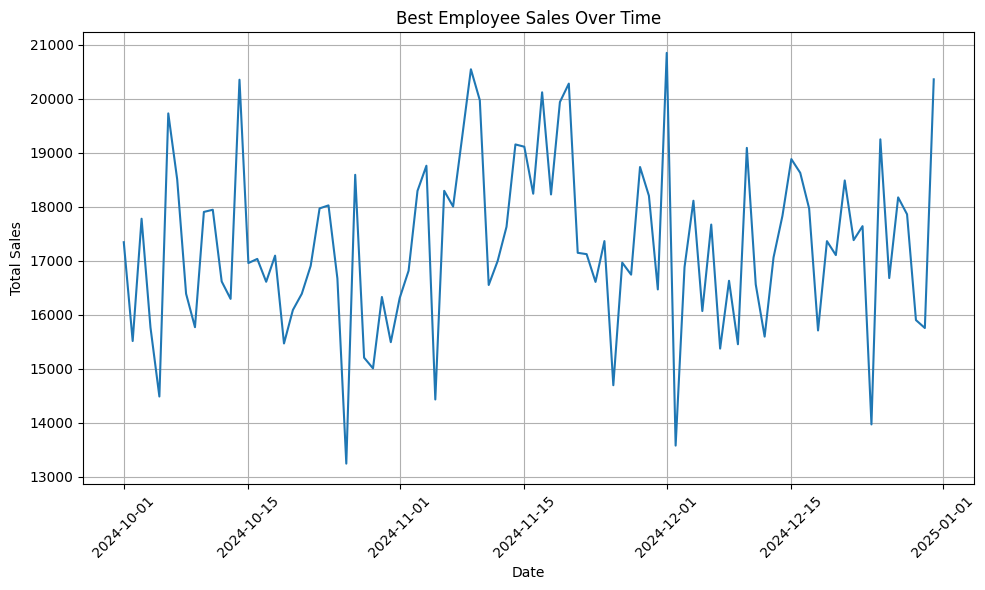

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt


# Convert the 'Date' column to datetime objects
best_employee_sales_dates['Date'] = pd.to_datetime(best_employee_sales_dates['Date'])

# Create the line graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(best_employee_sales_dates['Date'], best_employee_sales_dates['TotalSales'])

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Best Employee Sales Over Time')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


<ipython-input-17-54b8526f5c48>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='employee', y='total_sales', data=df_plot, palette="Blues_d")


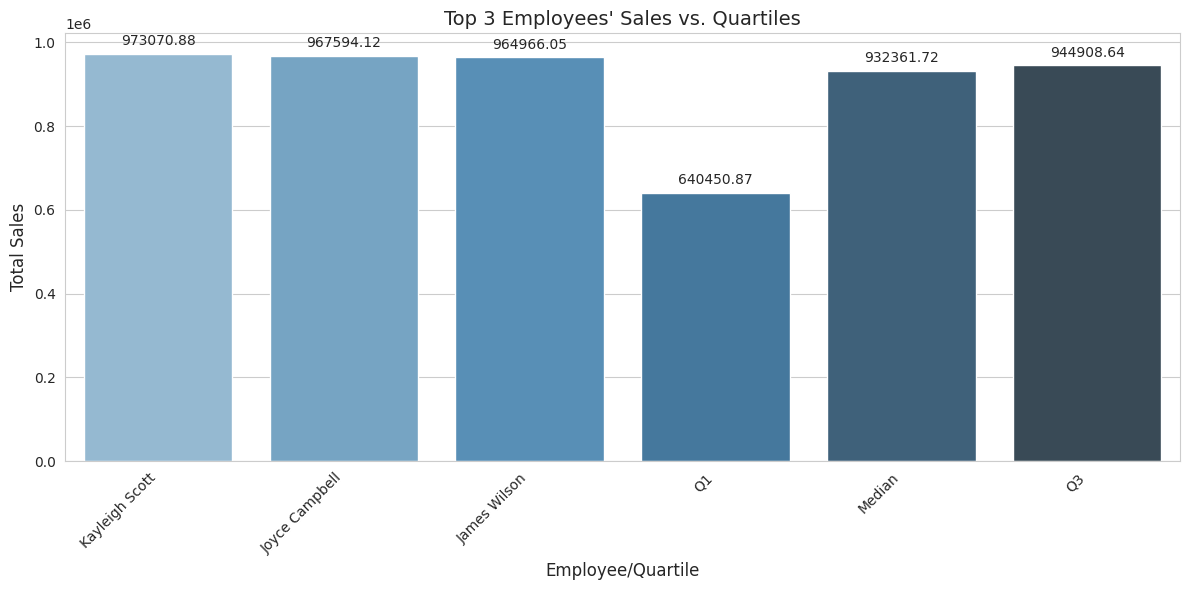

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate quartiles
q1 = EmployeeSalesRoleStorePerformance_df['total_sales'].quantile(0.25)
q3 = EmployeeSalesRoleStorePerformance_df['total_sales'].quantile(0.75)
median_sales = EmployeeSalesRoleStorePerformance_df['total_sales'].median()

# Get the top 3 employees
top_3_employees = EmployeeSalesRoleStorePerformance_df.nlargest(3, 'total_sales')

# Create a list for plotting
employees_data = []
for index, row in top_3_employees.iterrows():
    employees_data.append({'employee': row['Fname'] + ' ' + row['Lname'], 'total_sales': row['total_sales']})

employees_data.append({'employee': 'Q1', 'total_sales': q1})
employees_data.append({'employee': 'Median', 'total_sales': median_sales})
employees_data.append({'employee': 'Q3', 'total_sales': q3})

# Convert to DataFrame for plotting
df_plot = pd.DataFrame(employees_data)

# Set the style
sns.set_style("whitegrid")

# Create the bar chart
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='employee', y='total_sales', data=df_plot, palette="Blues_d")

# Set labels and title
plt.xlabel("Employee/Quartile", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Top 3 Employees' Sales vs. Quartiles", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')


# Show the plot
plt.tight_layout()
plt.show()


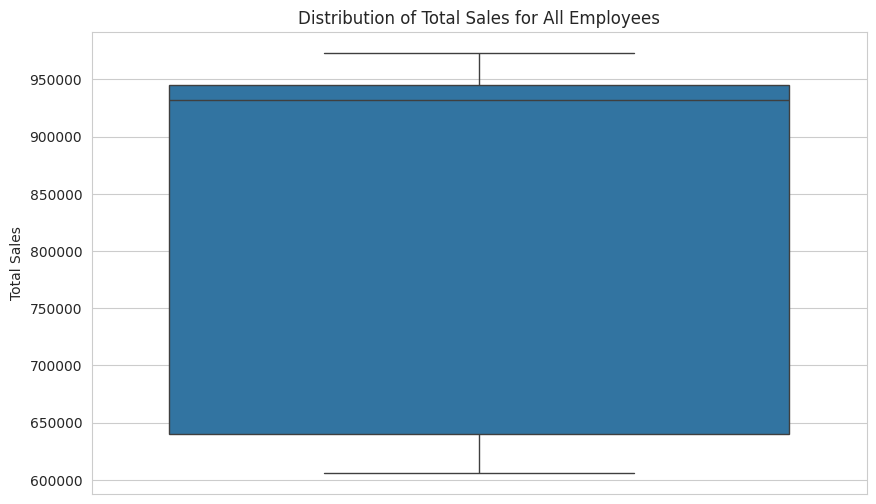

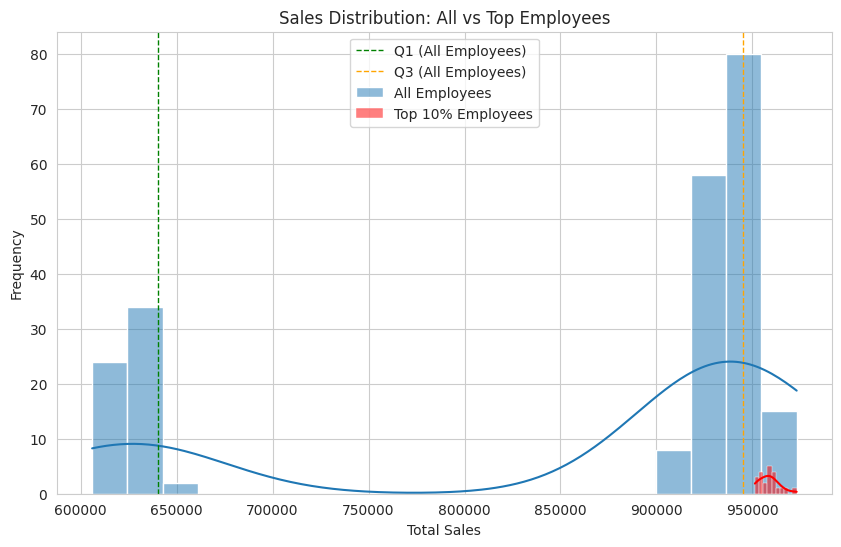

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(y='total_sales', data=EmployeeSalesRoleStorePerformance_df)
plt.title('Distribution of Total Sales for All Employees')
plt.ylabel('Total Sales')
plt.show()

# Calculate quartiles for the overall sales distribution
q1_overall = EmployeeSalesRoleStorePerformance_df['total_sales'].quantile(0.25)
q3_overall = EmployeeSalesRoleStorePerformance_df['total_sales'].quantile(0.75)

# Identify top employees (e.g., top 10%)
top_employees = EmployeeSalesRoleStorePerformance_df.nlargest(int(len(EmployeeSalesRoleStorePerformance_df)*0.1), 'total_sales')

plt.figure(figsize=(10,6))
sns.histplot(EmployeeSalesRoleStorePerformance_df['total_sales'], bins=20, kde=True, label='All Employees')
sns.histplot(top_employees['total_sales'], bins=10, kde=True, color='red', label='Top 10% Employees')
plt.axvline(q1_overall, color='green', linestyle='dashed', linewidth=1, label='Q1 (All Employees)')
plt.axvline(q3_overall, color='orange', linestyle='dashed', linewidth=1, label='Q3 (All Employees)')
plt.title('Sales Distribution: All vs Top Employees')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# Query: Number of Stores per Sales Analyst
StoresPerSalesAnalyst = pd.read_sql_query(
    '''
    SELECT
        e.employeeid,
        e.fname,
        e.lname,
        COUNT(DISTINCT es.storeid) AS num_stores
    FROM
        employee_details_data e
    JOIN
        employee_store_data es ON e.employeeid = es.employeeid
    JOIN
        employee_roles_data er ON e.employeeid = er.employeeid
    WHERE
        er.Role = 'Sales Analyst'  -- Filter for Sales Analysts
    GROUP BY
        e.employeeid, e.fname, e.lname
    ORDER BY
        num_stores DESC;  -- Order by number of stores in descending order
    ''', conn)

print("Number of Stores per Sales Analyst:")
print(StoresPerSalesAnalyst)

Number of Stores per Sales Analyst:
    EmployeeID     Fname    Lname  num_stores
0         E001   Jessica    Brown           3
1         E002     Harry    Smith           3
2         E003     Harry   Murray           3
3         E004      Emma   Cooper           3
4         E005   Jessica   Carter           3
..         ...       ...      ...         ...
216      E9661      Gary   Sharpe           2
217      E9733     Brett  Davison           2
218      E9838  Kathleen    Singh           2
219      E9847     Derek   Barker           2
220      E9956    Andrea     Gray           2

[221 rows x 4 columns]


In [ ]:
# Query: Products Sold by Each Sales Analyst
ProductsPerSalesAnalyst = pd.read_sql_query(
    '''
    SELECT
        e.employeeid,
        e.fname,
        e.lname,
        p.productid,
        p.category,
        SUM(s.quantity) AS total_quantity_sold,
        SUM(s.salesvalue) AS total_sales_value
    FROM
        employee_details_data e
    JOIN
        employee_store_data es ON e.employeeid = es.employeeid
    JOIN
        Sales s ON es.storeid = s.storeid
    JOIN
        Products p ON s.productid = p.productid
    JOIN
        employee_roles_data er ON e.employeeid = er.employeeid
    WHERE
        er.Role = 'Sales Analyst'  -- Filter for Sales Analysts
    AND
        e.employeeid IN ('E3730', 'E6716', 'E039')
    GROUP BY
        e.employeeid, e.fname, e.lname, p.productid, p.name
    ORDER BY
        e.employeeid, total_sales_value DESC;  -- Order by employee and total sales value
    ''', conn)

print("Products Sold by Each Sales Analyst:")
print(ProductsPerSalesAnalyst)

Products Sold by Each Sales Analyst:
   EmployeeID  Fname     Lname ProductID     Category  total_quantity_sold  \
0        E039  James    Wilson      P029   Hair Serum                 4596   
1        E039  James    Wilson      P008    Hair Mask                 4392   
2        E039  James    Wilson      P006   Hair Serum                 4431   
3        E039  James    Wilson      P015    Hair Mask                 4192   
4        E039  James    Wilson      P016   Hair Serum                 4228   
..        ...    ...       ...       ...          ...                  ...   
85      E6716  Joyce  Campbell      P027      Shampoo                 4033   
86      E6716  Joyce  Campbell      P005  Conditioner                 4036   
87      E6716  Joyce  Campbell      P014  Conditioner                 3582   
88      E6716  Joyce  Campbell      P017  Conditioner                 4246   
89      E6716  Joyce  Campbell      P003  Conditioner                 4434   

    total_sales_value  
0 

In [ ]:
ProductsPerSalesAnalystlowest = pd.read_sql_query(
    '''
    SELECT
        e.employeeid,
        e.fname,
        e.lname,
        p.productid,
        p.category,
        SUM(s.quantity) AS total_quantity_sold,
        SUM(s.salesvalue) AS total_sales_value
    FROM
        employee_details_data e
    JOIN
        employee_store_data es ON e.employeeid = es.employeeid
    JOIN
        Sales s ON es.storeid = s.storeid
    JOIN
        Products p ON s.productid = p.productid
    JOIN
        employee_roles_data er ON e.employeeid = er.employeeid
    WHERE
        er.Role = 'Sales Analyst'  -- Filter for Sales Analysts
    AND
        e.employeeid IN ('E8169', 'E8517', 'E9068')
    GROUP BY
        e.employeeid, e.fname, e.lname, p.productid, p.name
    ORDER BY
        e.employeeid, total_sales_value DESC;  -- Order by employee and total sales value
    ''', conn)

print("Products Sold by Each Sales Analyst:")
print(ProductsPerSalesAnalystlowest)

Products Sold by Each Sales Analyst:
   EmployeeID     Fname    Lname ProductID     Category  total_quantity_sold  \
0       E8169      Jane    Scott      P029   Hair Serum                 3135   
1       E8169      Jane    Scott      P010   Hair Serum                 3175   
2       E8169      Jane    Scott      P015    Hair Mask                 2633   
3       E8169      Jane    Scott      P008    Hair Mask                 2606   
4       E8169      Jane    Scott      P006   Hair Serum                 2454   
..        ...       ...      ...       ...          ...                  ...   
85      E9068  Danielle  Roberts      P023      Shampoo                 2483   
86      E9068  Danielle  Roberts      P027      Shampoo                 2410   
87      E9068  Danielle  Roberts      P017  Conditioner                 2999   
88      E9068  Danielle  Roberts      P005  Conditioner                 2611   
89      E9068  Danielle  Roberts      P003  Conditioner                 2554   

  

In [ ]:
StoresPerSalesAnalyst = pd.read_sql_query(
    '''
    SELECT
        e.employeeid,
        e.fname,
        e.lname,
        st.storeid,
        st.storename,
        SUM(s.quantity) AS total_quantity_sold,
        SUM(s.salesvalue) AS total_sales_value
    FROM
        employee_details_data e
    JOIN
        employee_store_data es ON e.employeeid = es.employeeid
    JOIN
        Sales s ON es.storeid = s.storeid
    JOIN
        stores st ON st.storeid = s.storeid
    JOIN
        employee_roles_data er ON e.employeeid = er.employeeid
    WHERE
        er.Role = 'Sales Analyst'  -- Filter for Sales Analysts
    AND
        e.employeeid IN ('E3730', 'E6716', 'E039')
    GROUP BY
        e.employeeid, e.fname, e.lname, st.storeid, st.storename
    ORDER BY
        e.employeeid, total_sales_value DESC;  -- Order by employee and total sales value
    ''', conn)

print("Store by Each Sales Analyst:")
print(StoresPerSalesAnalyst)

Store by Each Sales Analyst:
  EmployeeID     Fname     Lname   StoreID          StoreName  \
0       E039     James    Wilson  LE037775              Boots   
1       E039     James    Wilson  BM066389   Salon Essentials   
2       E039     James    Wilson  MN051637     Premier Stores   
3      E3730  Kayleigh     Scott  LE051691      Tesco Express   
4      E3730  Kayleigh     Scott  GL023015              Tesco   
5      E3730  Kayleigh     Scott  LE067236  Pro Hair & Beauty   
6      E6716     Joyce  Campbell  LV061429  Pro Hair & Beauty   
7      E6716     Joyce  Campbell  BM046676          Debenhams   
8      E6716     Joyce  Campbell  LD024557              Tesco   

   total_quantity_sold  total_sales_value  
0                43245          326704.75  
1                42160          320003.80  
2                42215          318257.50  
3                44326          338837.32  
4                42372          321948.82  
5                42024          312284.74  
6           

In [ ]:
StoresPerSalesAnalystlowest = pd.read_sql_query(
    '''
    SELECT
        e.employeeid,
        e.fname,
        e.lname,
        st.storeid,
        st.storename,
        SUM(s.quantity) AS total_quantity_sold,
        SUM(s.salesvalue) AS total_sales_value
    FROM
        employee_details_data e
    JOIN
        employee_store_data es ON e.employeeid = es.employeeid
    JOIN
        Sales s ON es.storeid = s.storeid
    JOIN
        stores st ON st.storeid = s.storeid
    JOIN
        employee_roles_data er ON e.employeeid = er.employeeid
    WHERE
        er.Role = 'Sales Analyst'  -- Filter for Sales Analysts
    AND
        e.employeeid IN ('E8169', 'E8517', 'E9068')
    GROUP BY
        e.employeeid, e.fname, e.lname, st.storeid, st.storename
    ORDER BY
        e.employeeid, total_sales_value DESC;  -- Order by employee and total sales value
    ''', conn)

print("Store by Each Sales Analyst:")
print(StoresPerSalesAnalystlowest)

Store by Each Sales Analyst:
  EmployeeID     Fname    Lname   StoreID          StoreName  \
0      E8169      Jane    Scott  LV017339              Co-op   
1      E8169      Jane    Scott  LD057363  Sainsbury's Local   
2      E8517     Jason   Foster  LV053453      Tesco Express   
3      E8517     Jason   Foster  LD061059       Sally Beauty   
4      E9068  Danielle  Roberts  CV031435               Asda   
5      E9068  Danielle  Roberts  ED059704         Nisa Local   

   total_quantity_sold  total_sales_value  
0                40769          307130.96  
1                39616          298842.39  
2                40997          307186.55  
3                40271          300339.22  
4                40732          310393.11  
5                39590          298267.80  


In [ ]:


StoresPerSalesAnalystlowest.to_csv('StoresPerSalesAnalystlowest.csv', index=False)
StoresPerSalesAnalyst.to_csv('StoresPerSalesAnalyst.csv', index=False)
ProductsPerSalesAnalystlowest.to_csv('ProductsPerSalesAnalystlowest.csv', index=False)
ProductsPerSalesAnalyst.to_csv('ProductsPerSalesAnalyst.csv', index=False)
EmployeeSalesRoleStorePerformance_df.to_csv('EmployeeSalesRoleStorePerformance_df.csv', index=False)
